In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from math import *
import scipy as sp
import scipy.stats
import pandas as pd
import os.path

In [ ]:
n_expected = 15

n_pes = 10000

n_obs_pes = np.random.poisson(n_expected,n_pes)

In [57]:
%matplotlib notebook

In [ ]:
fig, (ax,lax) = plt.subplots(1,2,sharex=True)

bins=np.arange(0,50,1)

ax.hist(n_obs_pes,color='r',histtype="step",density=True,bins=bins)
lax.hist(n_obs_pes,color='r',bins=bins,histtype="step",density=True,log=True)
plt.show()

In [ ]:
fig,ax= plt.subplots()

bins=np.arange(0,50,1)
ax.hist(n_obs_pes,color='r',histtype="step",density=True,bins=bins,cumulative=True,log=True)
ax.set_xlim((0,35))
#ax.axhline(y=)[source]
plt.show()

In [ ]:
print('critical values from isf at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' % tuple(sp.stats.poisson.isf([0.01,0.05,0.10],20)))
print('critical values from isf at 99%%, 95%% and 90%% %8.4f %8.4f %8.4f' % tuple(sp.stats.poisson.isf([0.99,0.95,0.90],20)))

In [19]:
def get_coverage(prob_vals,coverage):
    total_integral = np.sum(prob_vals)

    prob_val_size = np.size(prob_vals)
    
    #find the max and add it into the coverage
    i_max = np.argmax(prob_vals)
    current_coverage = prob_vals[i_max]/total_integral
    
    coverage_interval = (i_max,i_max)
    #now, loop through the vector, adding in elements one by one based on most probable.
    while current_coverage<coverage:
        
        if coverage_interval[0]==0 and coverage_interval[1]==prob_val_size-1:
            break
        
        prob_low = 0.0
        prob_high = 0.0
        if coverage_interval[0]>0: prob_low = prob_vals[coverage_interval[0]-1]
        if coverage_interval[1]<prob_val_size-1: prob_high = prob_vals[coverage_interval[1]+1]
        
        if prob_high>prob_low:
            coverage_interval = (coverage_interval[0],coverage_interval[1]+1)
            current_coverage += prob_high/total_integral
        else:
            coverage_interval = (coverage_interval[0]-1,coverage_interval[1])
            current_coverage += prob_low/total_integral
    
    return coverage_interval

In [20]:
test_prob = np.array([0.0,0.1,0.2,0.5,0.9,1.2,0.9,0.5,0.2,0.1,0.0])
test_xvals = np.arange(0,np.size(test_prob),0.1)

cinterval = get_coverage(test_prob,0.9)
print cinterval

#print np.sum(test_prob[cinterval[0]:cinterval[1]+1])/np.sum(test_prob)

(2, 7)


In [78]:
n_obs_arr = np.arange(0,40,1)
exp_vals = np.arange(0.0,80,0.1)
prob_curves=[]

prob_cv = np.array([])
prob_1sigma_low = np.array([])
prob_1sigma_high = np.array([])
prob_2sigma_low = np.array([])
prob_2sigma_high = np.array([])

coverage_1sigma = 0.6827
coverage_2sigma = 0.9545

n_pes=10000

for n_obs in n_obs_arr:
    prob_vals = np.array([])
    for val in exp_vals:
        n_obs_pes = np.random.poisson(val,n_pes)
        prob_vals = np.append(prob_vals,[np.size(np.where(n_obs_pes==n_obs))*1.0 / np.size(n_obs_pes)])
    prob_curves.append(prob_vals)
    
    prob_cv = np.append(prob_cv,[exp_vals[np.argmax(prob_curves[-1])]])
    
    cinterval_1sigma = get_coverage(prob_curves[-1],coverage_1sigma)
    cinterval_2sigma = get_coverage(prob_curves[-1],coverage_2sigma)
    
    prob_1sigma_low = np.append(prob_1sigma_low,[exp_vals[cinterval_1sigma[0]]])
    prob_1sigma_high = np.append(prob_1sigma_high,[exp_vals[cinterval_1sigma[1]]])
    prob_2sigma_low = np.append(prob_2sigma_low,[exp_vals[cinterval_2sigma[0]]])
    prob_2sigma_high = np.append(prob_2sigma_high,[exp_vals[cinterval_2sigma[1]]])

<IPython.core.display.Javascript object>


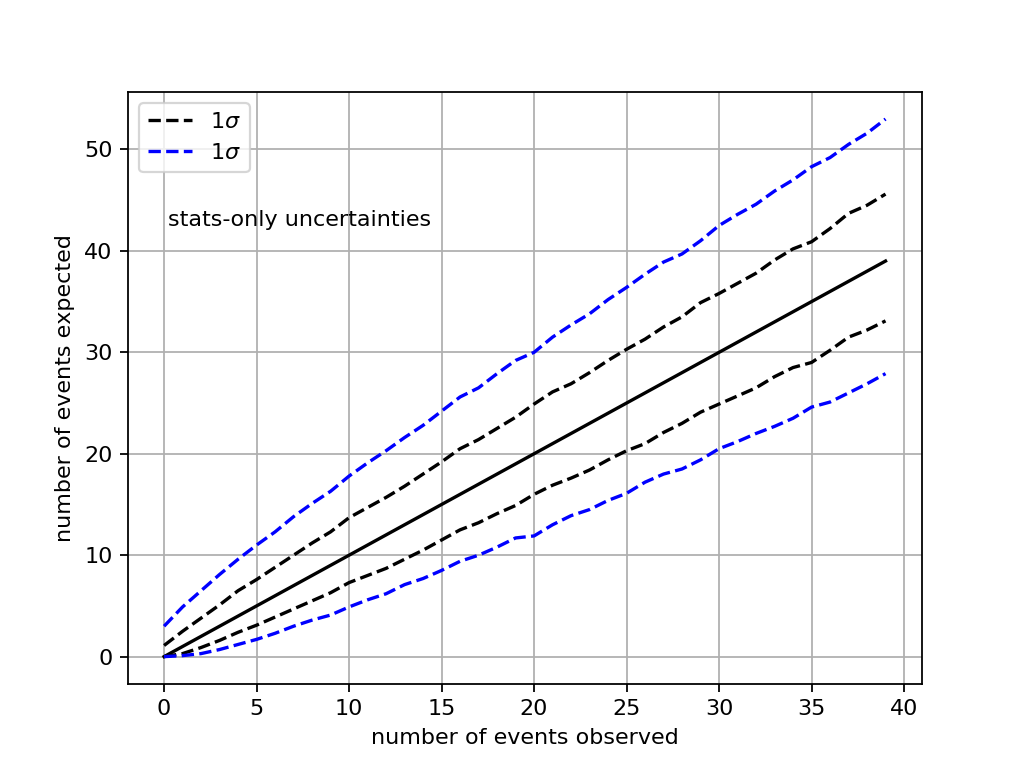

In [77]:
fig,ax= plt.subplots()

ax.grid()
ax.plot(n_obs_arr,n_obs_arr,color="black")
#ax.plot(n_obs_arr,prob_cv,color="red",linestyle=":")
ax.plot(n_obs_arr,prob_1sigma_low,color="black",linestyle="--",label="$1\sigma$")
ax.plot(n_obs_arr,prob_1sigma_high,color="black",linestyle="--")
ax.plot(n_obs_arr,prob_2sigma_low,color="blue",linestyle="--",label="$1\sigma$")
ax.plot(n_obs_arr,prob_2sigma_high,color="blue",linestyle="--")

ax.set_xlabel("number of events observed")
ax.set_ylabel("number of events expected")

ax.text(0.05, 0.8, "stats-only uncertainties", transform=ax.transAxes,
        verticalalignment='top')

plt.legend()

plt.show()